In [ ]:
#### JBL

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score, KFold,validation_curve,GridSearchCV
from sklearn.preprocessing import LabelEncoder
import csv
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
###########################################################################################################################################

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def splitting_data(data, col_target, col_drop=None, test_size=0.2, SPLIT_val_test=True, random_state=42):

    if col_drop:
        data = data.drop(columns=col_drop)

    X = data.drop(columns=[col_target])
    y = data[col_target]

    XTRAIN, TEMP_X, YTRAIN, TEMP_Y = train_test_split(X, y, test_size=test_size, random_state=random_state)

    if SPLIT_val_test:
        XVAL, XTEST, YVAL, YTEST = train_test_split(TEMP_X, TEMP_Y, test_size=0.5, random_state=random_state)
    else:
        XVAL =  TEMP_X
        YVAL = TEMP_Y
        XTEST = None
        YTEST = None

    return XTRAIN, XVAL, XTEST, YTRAIN, YVAL, YTEST

def sorting_features_by_importance(model, X, plot=False):

    feat_import = model.feature_importances_
    features = X.columns

    sorted_indices = np.argsort(feat_import)
    sorted_by_features = []
    sorted_by_importance = []

    for i in sorted_indices:
        sorted_by_features.append(features[i])
        sorted_by_importance.append(feat_import[i])

    if plot:
        plt.figure(figsize=(10, 8))
        plt.barh(sorted_by_features, sorted_by_importance)
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance for Random Forest')
        plt.show()

    return sorted_by_features, sorted_by_importance

def display_feature_importance_as_table(features, importance, title="Feature Importance", top_n=10):

    importance_percentage = [imp * 100 for imp in importance]

    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance (%)': importance_percentage
    }).sort_values(by='Importance (%)', ascending=False)

    top_features_df = importance_df.head(top_n)

    print(f"\n{title} - Top {top_n} Features")
    print(top_features_df)


def metrics_calculate(model, X_TRAIN, Y_TRAIN, X_VAL, Y_VAL, use_oob=True):
    PRED_Y_TRAIN = model.predict(X_TRAIN)
    PRED_Y_VAL = model.predict(X_VAL)

    RMSE_TRAIN = np.sqrt(mean_squared_error(Y_TRAIN, PRED_Y_TRAIN))
    RMSE_VAL = np.sqrt(mean_squared_error(Y_VAL, PRED_Y_VAL))
    R2_TRAIN = r2_score(Y_TRAIN, PRED_Y_TRAIN)
    R2_VAL = r2_score(Y_VAL, PRED_Y_VAL)

    R2_OOB = model.oob_score_ if use_oob and hasattr(model, "oob_score_") else None

    return RMSE_TRAIN, R2_TRAIN, RMSE_VAL, R2_VAL, R2_OOB

def feature_selection_wrapper(model, X_train, y_train, X_val, y_val, channel="FSO"):

    score_perform = []
    features = X_train.columns.tolist()

    for i in range(len(features) + 1):
        model.fit(X_train, y_train)
        feat_sort = sorted(zip(features, model.feature_importances_), key=lambda x: x[1])

        if i > 0:
            current_feature = feat_sort[0][0]
        else:
            current_feature = "All Features"

        metrics = metrics_calculate(model, X_train, y_train, X_val, y_val)
        score_perform.append((current_feature,) + metrics + (feat_sort[0][0], feat_sort[0][1]))

        if i > 0:
            features.remove(current_feature)
            X_train = X_train[features]
            X_val = X_val[features]

    return score_perform



In [ ]:
import pandas as pd

data = pd.read_csv('RFLFSODataFull.csv')

SYNOPCode_0 = data[data['SYNOPCode'] == 0]
SYNOPCode_3 = data[data['SYNOPCode'] == 3]
SYNOPCode_4 = data[data['SYNOPCode'] == 4]
SYNOPCode_5 = data[data['SYNOPCode'] == 5]
SYNOPCode_6 = data[data['SYNOPCode'] == 6]
SYNOPCode_7 = data[data['SYNOPCode'] == 7]
SYNOPCode_8 = data[data['SYNOPCode'] == 8]

sizes = {
    'SYNOPCode_0 (Clear Weather)': SYNOPCode_0.shape[0],
    'SYNOPCode_3 (Dust Storm)': SYNOPCode_3.shape[0],
    'SYNOPCode_4 (Fog)': SYNOPCode_4.shape[0],
    'SYNOPCode_5 (Drizzle)': SYNOPCode_5.shape[0],
    'SYNOPCode_6 (Rain)': SYNOPCode_6.shape[0],
    'SYNOPCode_7 (Snow)': SYNOPCode_7.shape[0],
    'SYNOPCode_8 (Showers)': SYNOPCode_8.shape[0]
}

print(pd.DataFrame(list(sizes.items()), columns=['SYNOP Code', 'Size']))


                    SYNOP Code   Size
0  SYNOPCode_0 (Clear Weather)  56964
1     SYNOPCode_3 (Dust Storm)    191
2            SYNOPCode_4 (Fog)    466
3        SYNOPCode_5 (Drizzle)   6605
4           SYNOPCode_6 (Rain)  25018
5           SYNOPCode_7 (Snow)    419
6        SYNOPCode_8 (Showers)   1716


In [ ]:


file_path = 'RFLFSODataFull.csv'
data = pd.read_csv(file_path)

SYNOP = [0, 3, 4, 5, 6, 7, 8]

split_data_FSO = {}
split_data_RF = {}

for weather_code in SYNOP:
    subset = data[data['SYNOPCode'] == weather_code]
    split_data_FSO[weather_code] = splitting_data(subset, "FSO_Att", col_drop=["Frequency", 'RFL_Att'])
    split_data_RF[weather_code] = splitting_data(subset, "RFL_Att", col_drop=['FSO_Att'])


# Best parameters for FSO Att : {'max_depth': 30,  'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 140}
# Best parameters for RF Att : {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}


# SYNOPCode 0 (Clear Weather)

FSO_0_X_train, FSO_0_X_val, FSO_0_X_test, FSO_0_Y_train, FSO_0_Y_val,  FSO_0_Y_test = split_data_FSO[0]
RF_0_X_train, RF_0_X_val, RF_0_X_test,  RF_0_Y_train, RF_0_Y_val, RF_0_Y_test = split_data_RF[0]

FSO_0 = RandomForestRegressor(n_estimators = 140, max_depth=30, min_samples_leaf = 1,
                              random_state = 42, min_samples_split =2, oob_score=True, n_jobs= -1)

FSO_0_performance_scores = feature_selection_wrapper (FSO_0, FSO_0_X_train, FSO_0_Y_train, FSO_0_X_val, FSO_0_Y_val, channel = "FSO")

FSO_0_df= pd.DataFrame(FSO_0_performance_scores, columns= ["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
FSO_0_df.to_csv("FSO_feature_importance_0.csv", index=False)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

In [ ]:
RF_0= RandomForestRegressor(n_estimators = 130, max_depth=30, min_samples_leaf = 1,
                            random_state = 42, min_samples_split = 2, oob_score=True,n_jobs=-1)

RF_0_performance_scores = feature_selection_wrapper (RF_0,RF_0_X_train,RF_0_Y_train,RF_0_X_val,RF_0_Y_val,channel = "RFL")

RF_0_df = pd.DataFrame(RF_0_performance_scores, columns=["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
RF_0_df.to_csv("RF_feature_importance_0.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

In [ ]:
# SYNOPCode 3 (Dust Storm)
FSO_3_X_train, FSO_3_X_val, FSO_3_X_test, FSO_3_Y_train, FSO_3_Y_val,  FSO_3_Y_test = split_data_FSO[3]
RF_3_X_train, RF_3_X_val, RF_3_X_test,  RF_3_Y_train, RF_3_Y_val, RF_3_Y_test = split_data_RF[3]

FSO_3 = RandomForestRegressor(n_estimators = 140, max_depth=30, min_samples_leaf = 1,
                              random_state = 42, min_samples_split =2, oob_score=True, n_jobs= -1)

FSO_3_performance_scores = feature_selection_wrapper (FSO_3, FSO_3_X_train, FSO_3_Y_train, FSO_3_X_val, FSO_3_Y_val, channel = "FSO")

FSO_3_df= pd.DataFrame(FSO_3_performance_scores, columns= ["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
FSO_3_df.to_csv("FSO_feature_importance_3.csv", index=False)

RF_3= RandomForestRegressor(n_estimators = 130, max_depth=30, min_samples_leaf = 1,
                            random_state = 42, min_samples_split = 2, oob_score=True,n_jobs=-1)

RF_3_performance_scores = feature_selection_wrapper (RF_3, RF_3_X_train,RF_3_Y_train,RF_3_X_val,RF_3_Y_val,channel = "RFL")

RF_3_df = pd.DataFrame(RF_3_performance_scores, columns=["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
RF_3_df.to_csv("RF_feature_importance_3.csv", index=False)



# SYNOPCode 4 (Fog)
FSO_4_X_train, FSO_4_X_val, FSO_4_X_test, FSO_4_Y_train, FSO_4_Y_val,  FSO_4_Y_test = split_data_FSO[4]
RF_4_X_train, RF_4_X_val, RF_4_X_test,  RF_4_Y_train, RF_4_Y_val, RF_4_Y_test = split_data_RF[4]

FSO_4 = RandomForestRegressor(n_estimators = 140, max_depth=30, min_samples_leaf = 1,
                              random_state = 42, min_samples_split =2, oob_score=True, n_jobs= -1)

FSO_4_performance_scores = feature_selection_wrapper (FSO_4, FSO_4_X_train, FSO_4_Y_train, FSO_4_X_val, FSO_4_Y_val, channel = "FSO")

FSO_4_df= pd.DataFrame(FSO_4_performance_scores, columns= ["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
FSO_4_df.to_csv("FSO_feature_importance_4.csv", index=False)

RF_4= RandomForestRegressor(n_estimators = 130, max_depth=30, min_samples_leaf = 1,
                            random_state = 42, min_samples_split = 2, oob_score=True,n_jobs=-1)

RF_4_performance_scores = feature_selection_wrapper (RF_4, RF_4_X_train,RF_4_Y_train,RF_4_X_val,RF_4_Y_val,channel = "RFL")

RF_4_df = pd.DataFrame(RF_4_performance_scores, columns=["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
RF_4_df.to_csv("RF_feature_importance_4.csv", index=False)

# SYNOPCode 5 (Drizzle)
FSO_5_X_train, FSO_5_X_val, FSO_5_X_test, FSO_5_Y_train, FSO_5_Y_val,  FSO_5_Y_test = split_data_FSO[5]
RF_5_X_train, RF_5_X_val, RF_5_X_test,  RF_5_Y_train, RF_5_Y_val, RF_5_Y_test = split_data_RF[5]

FSO_5 = RandomForestRegressor(n_estimators = 140, max_depth=30, min_samples_leaf = 1,
                              random_state = 42, min_samples_split =2, oob_score=True, n_jobs= -1)

FSO_5_performance_scores = feature_selection_wrapper (FSO_5, FSO_5_X_train, FSO_5_Y_train, FSO_5_X_val, FSO_5_Y_val, channel = "FSO")

FSO_5_df= pd.DataFrame(FSO_5_performance_scores, columns= ["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
FSO_5_df.to_csv("FSO_feature_importance_5.csv", index=False)

RF_5= RandomForestRegressor(n_estimators = 130, max_depth=30, min_samples_leaf = 1,
                            random_state = 42, min_samples_split = 2, oob_score=True,n_jobs=-1)

RF_5_performance_scores = feature_selection_wrapper (RF_5, RF_5_X_train,RF_5_Y_train,RF_5_X_val,RF_5_Y_val,channel = "RFL")

RF_5_df = pd.DataFrame(RF_5_performance_scores, columns=["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
RF_5_df.to_csv("RF_feature_importance_5.csv", index=False)

# SYNOPCode 6 (Rain)
FSO_6_X_train, FSO_6_X_val, FSO_6_X_test, FSO_6_Y_train, FSO_6_Y_val,  FSO_6_Y_test = split_data_FSO[6]
RF_6_X_train, RF_6_X_val, RF_6_X_test,  RF_6_Y_train, RF_6_Y_val, RF_6_Y_test = split_data_RF[6]

FSO_6 =RandomForestRegressor(n_estimators = 140, max_depth=30, min_samples_leaf = 1,
                              random_state = 42, min_samples_split =2, oob_score=True, n_jobs= -1)

FSO_6_performance_scores = feature_selection_wrapper (FSO_6, FSO_6_X_train, FSO_6_Y_train, FSO_6_X_val, FSO_6_Y_val, channel = "FSO")

FSO_6_df= pd.DataFrame(FSO_6_performance_scores, columns= ["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
FSO_6_df.to_csv("FSO_feature_importance_6.csv", index=False)

RF_6= RandomForestRegressor(n_estimators = 130, max_depth=30, min_samples_leaf = 1,
                            random_state = 42, min_samples_split = 2, oob_score=True,n_jobs=-1)

RF_6_performance_scores = feature_selection_wrapper (RF_6, RF_6_X_train,RF_6_Y_train,RF_6_X_val,RF_6_Y_val,channel = "RFL")

RF_6_df = pd.DataFrame(RF_6_performance_scores, columns=["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
RF_6_df.to_csv("RF_feature_importance_6.csv", index=False)

# SYNOPCode 7 (Snow)
FSO_7_X_train, FSO_7_X_val, FSO_7_X_test, FSO_7_Y_train, FSO_7_Y_val,  FSO_7_Y_test = split_data_FSO[7]
RF_7_X_train, RF_7_X_val, RF_7_X_test,  RF_7_Y_train, RF_7_Y_val, RF_7_Y_test = split_data_RF[7]

FSO_7 =RandomForestRegressor(n_estimators = 140, max_depth=30, min_samples_leaf = 1,
                              random_state = 42, min_samples_split =2, oob_score=True, n_jobs= -1)

FSO_7_performance_scores = feature_selection_wrapper (FSO_7, FSO_7_X_train, FSO_7_Y_train, FSO_7_X_val, FSO_7_Y_val, channel = "FSO")

FSO_7_df= pd.DataFrame(FSO_7_performance_scores, columns= ["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
FSO_7_df.to_csv("FSO_feature_importance_7.csv", index=False)

RF_7= RandomForestRegressor(n_estimators = 130, max_depth=30, min_samples_leaf = 1,
                            random_state = 42, min_samples_split = 2, oob_score=True,n_jobs=-1)

RF_7_performance_scores = feature_selection_wrapper (RF_7, RF_7_X_train, RF_7_Y_train, RF_7_X_val, RF_7_Y_val, channel = "RFL")

RF_7_df = pd.DataFrame(RF_7_performance_scores, columns=["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
RF_7_df.to_csv("RF_feature_importance_7.csv", index=False)

# SYNOPCode 8 (Showers)
FSO_8_X_train, FSO_8_X_val, FSO_8_X_test, FSO_8_Y_train, FSO_8_Y_val,  FSO_8_Y_test = split_data_FSO[8]
RF_8_X_train, RF_8_X_val, RF_8_X_test,  RF_8_Y_train, RF_8_Y_val, RF_8_Y_test = split_data_RF[8]

FSO_8 = RandomForestRegressor(n_estimators = 140, max_depth=30, min_samples_leaf = 1,
                              random_state = 42, min_samples_split =2, oob_score=True, n_jobs= -1)

FSO_8_performance_scores = feature_selection_wrapper (FSO_8, FSO_8_X_train, FSO_8_Y_train, FSO_8_X_val, FSO_8_Y_val, channel = "FSO")

FSO_8_df= pd.DataFrame(FSO_8_performance_scores, columns= ["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
FSO_8_df.to_csv("FSO_feature_importance_8.csv", index=False)

RF_8= RandomForestRegressor(n_estimators = 130, max_depth=30, min_samples_leaf = 1,
                            random_state = 42, min_samples_split = 2, oob_score=True,n_jobs=-1)

RF_8_performance_scores = feature_selection_wrapper (RF_8, RF_8_X_train,RF_8_Y_train,RF_8_X_val,RF_8_Y_val,channel = "RFL")

RF_8_df = pd.DataFrame(RF_8_performance_scores, columns=["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","importance_score"])
RF_8_df.to_csv("RF_feature_importance_8.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

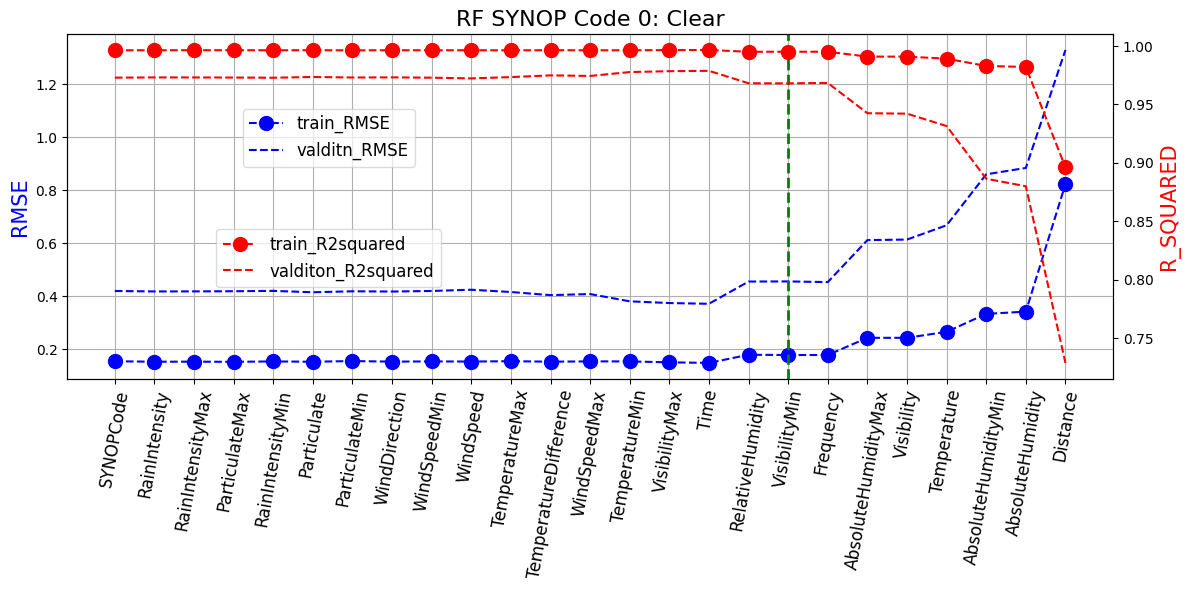

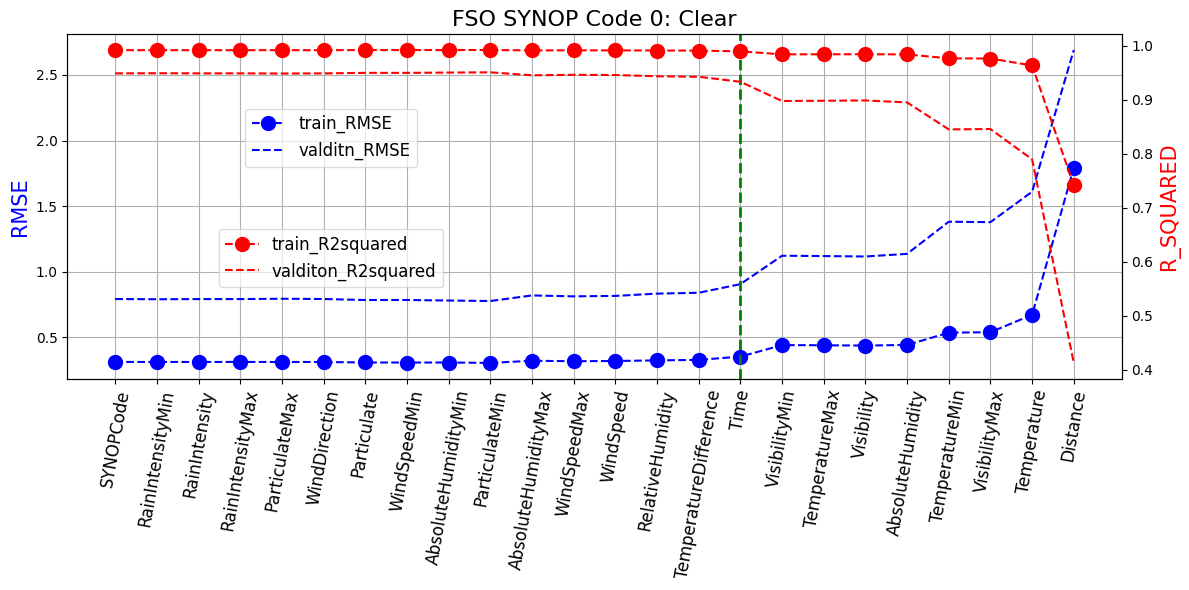

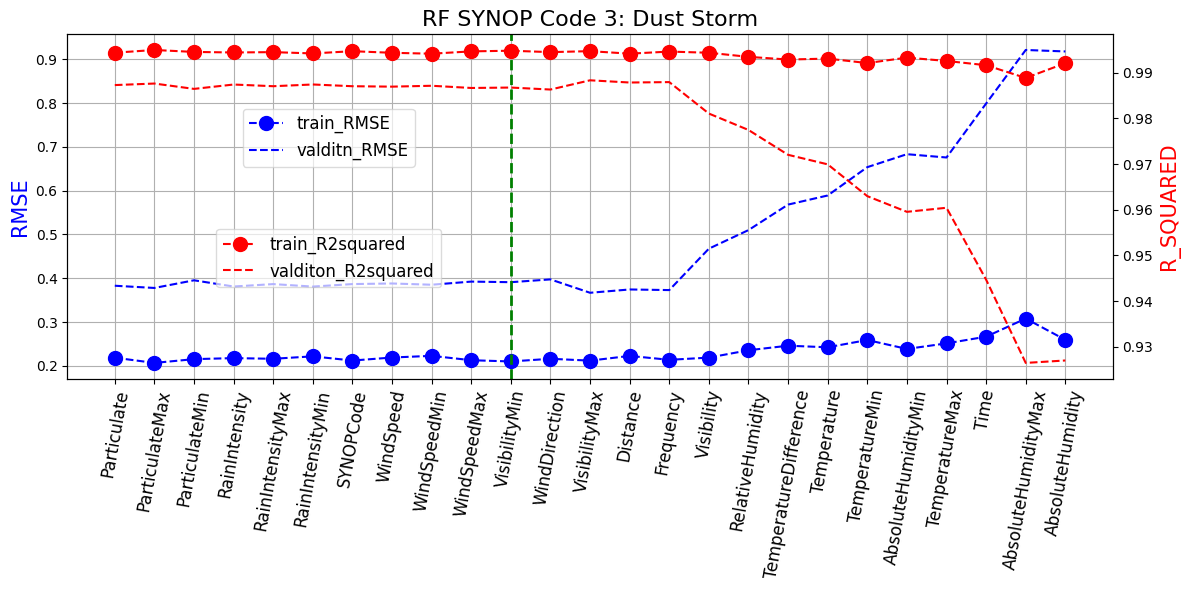

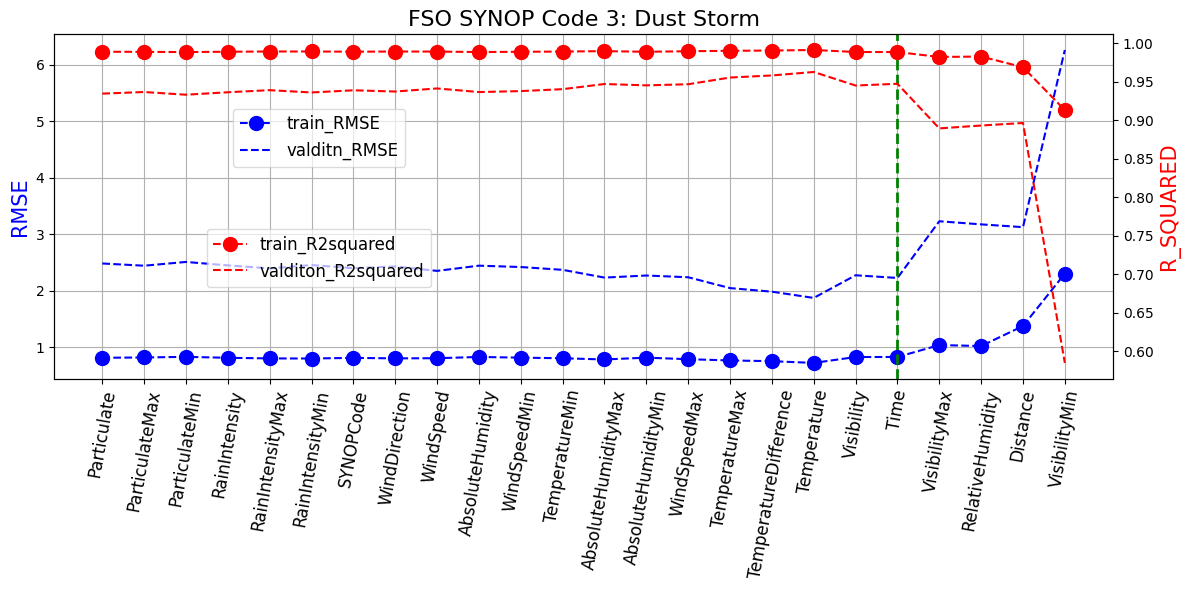

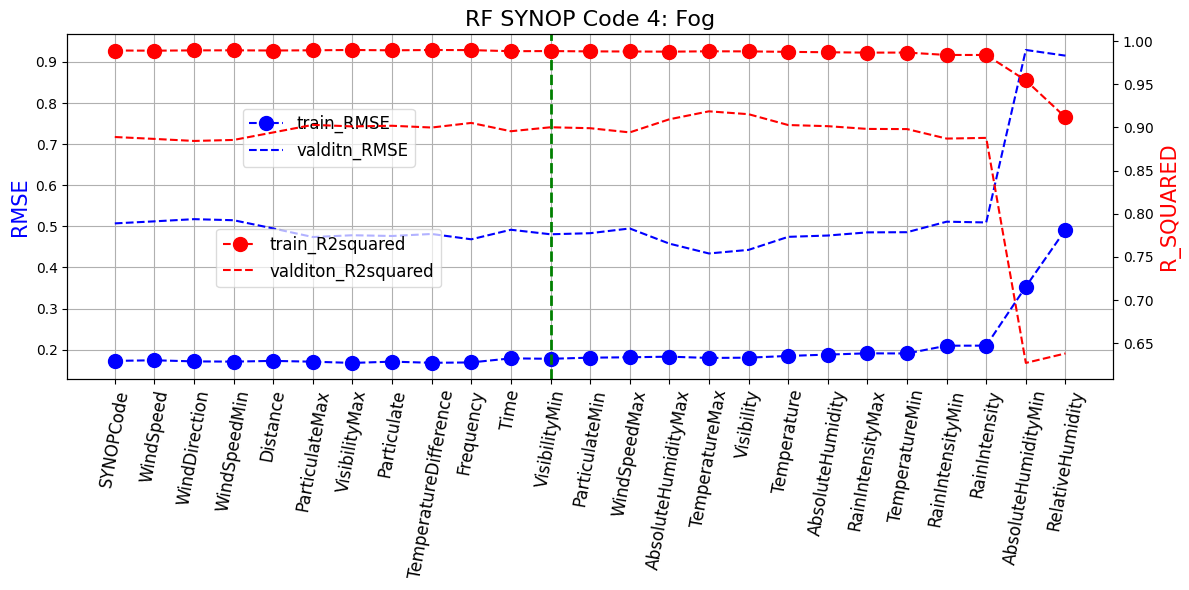

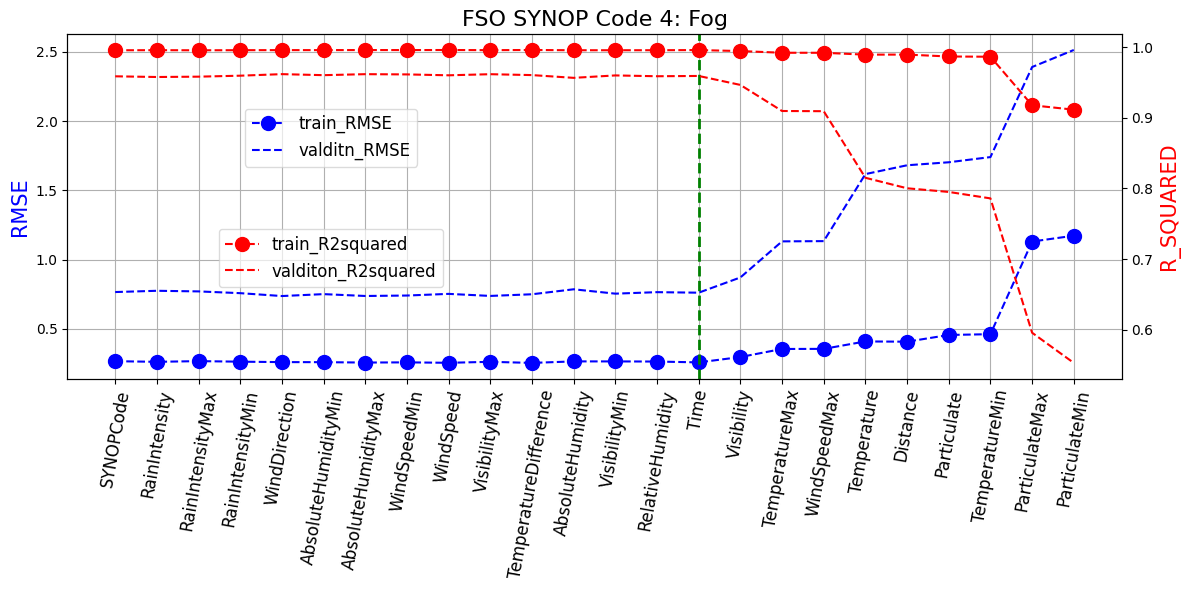

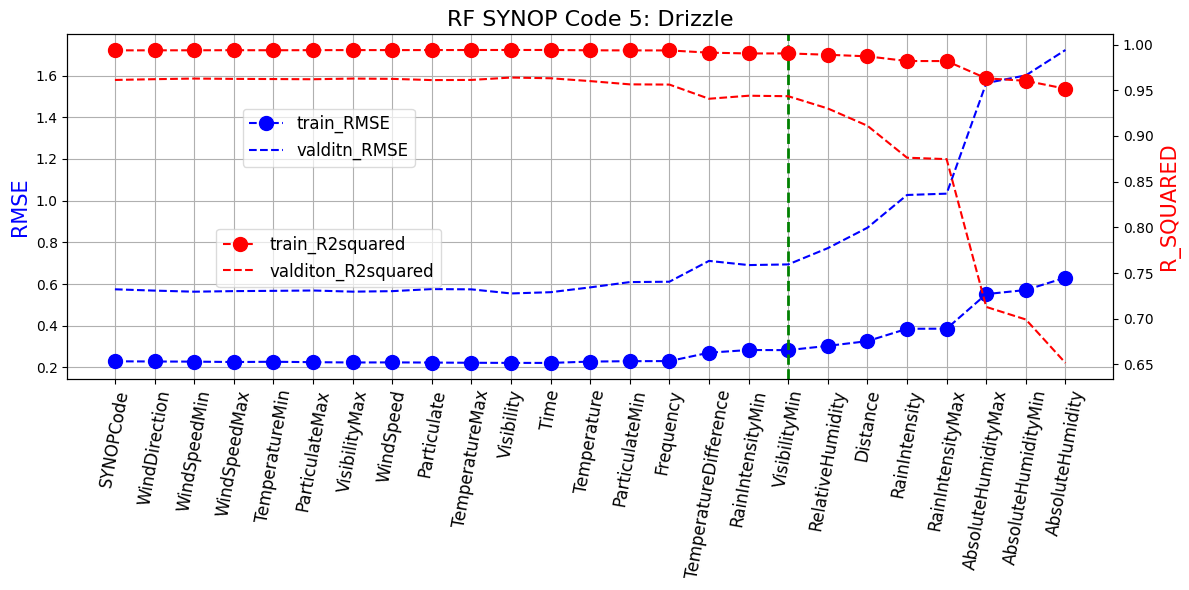

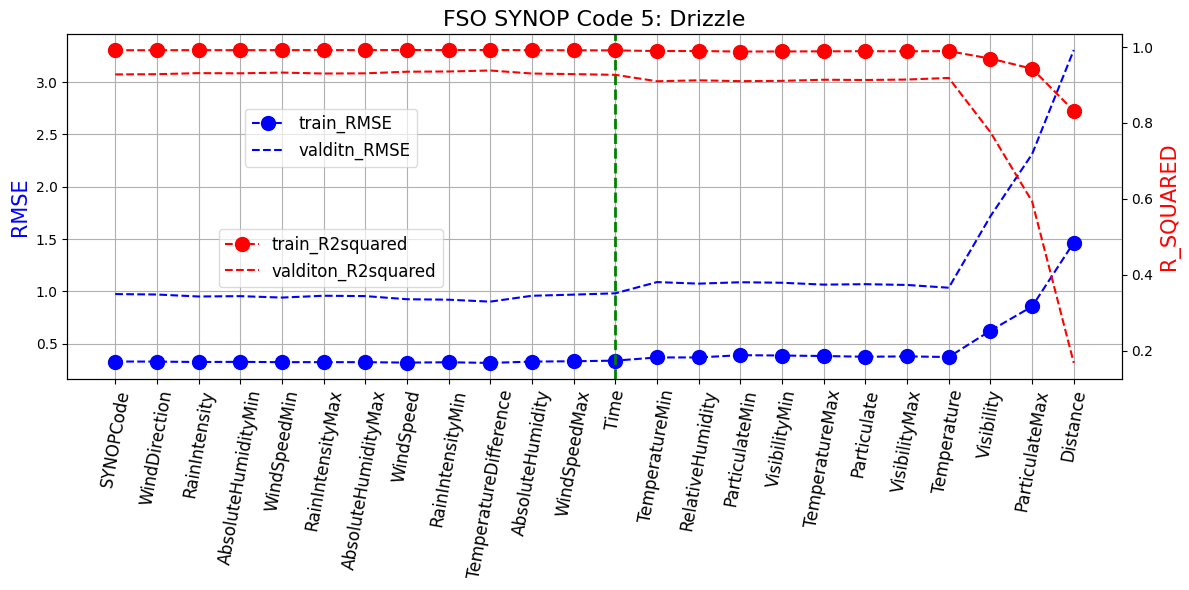

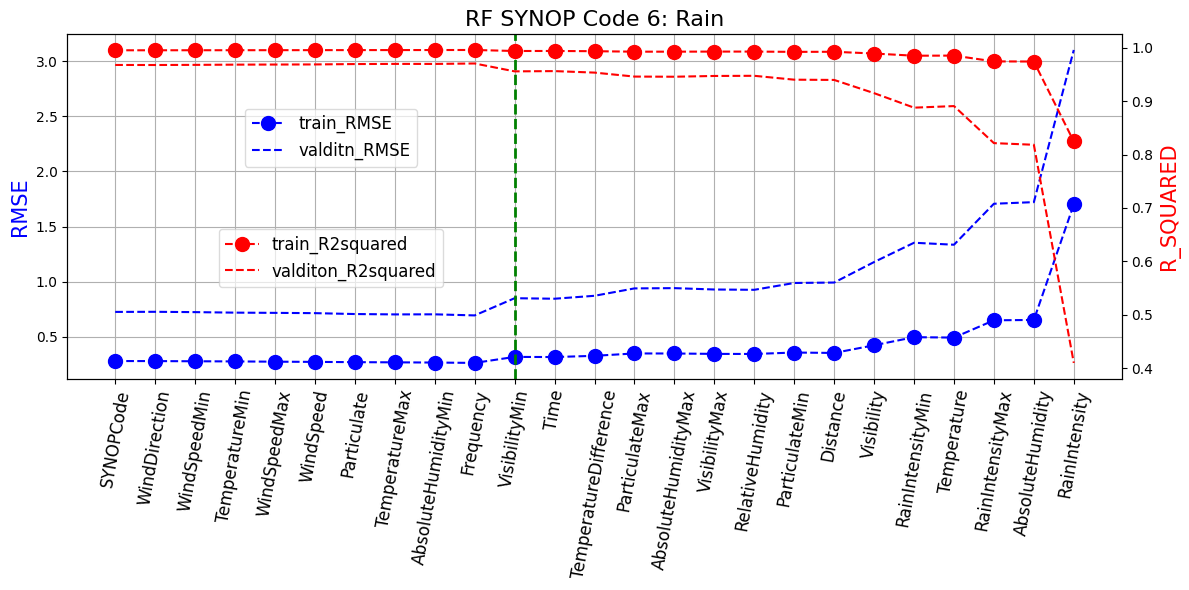

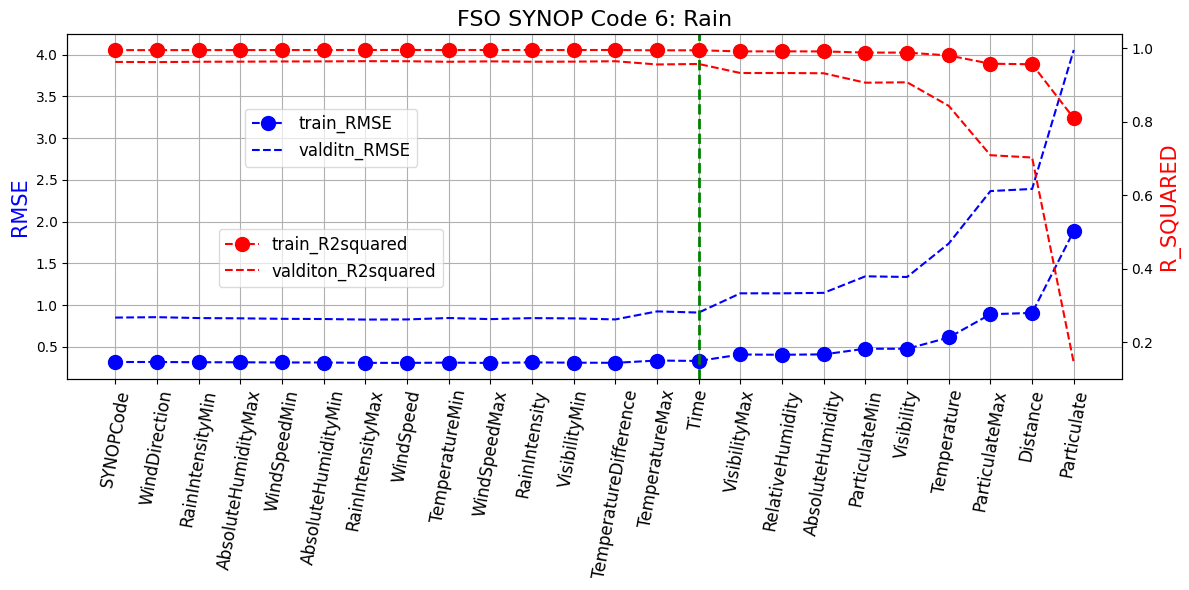

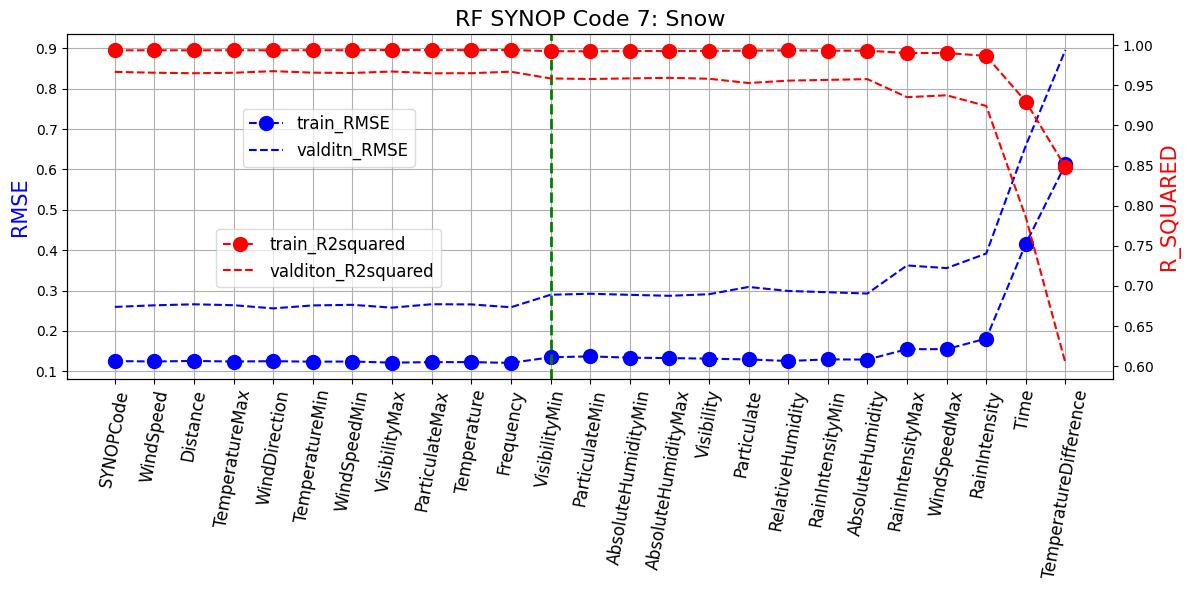

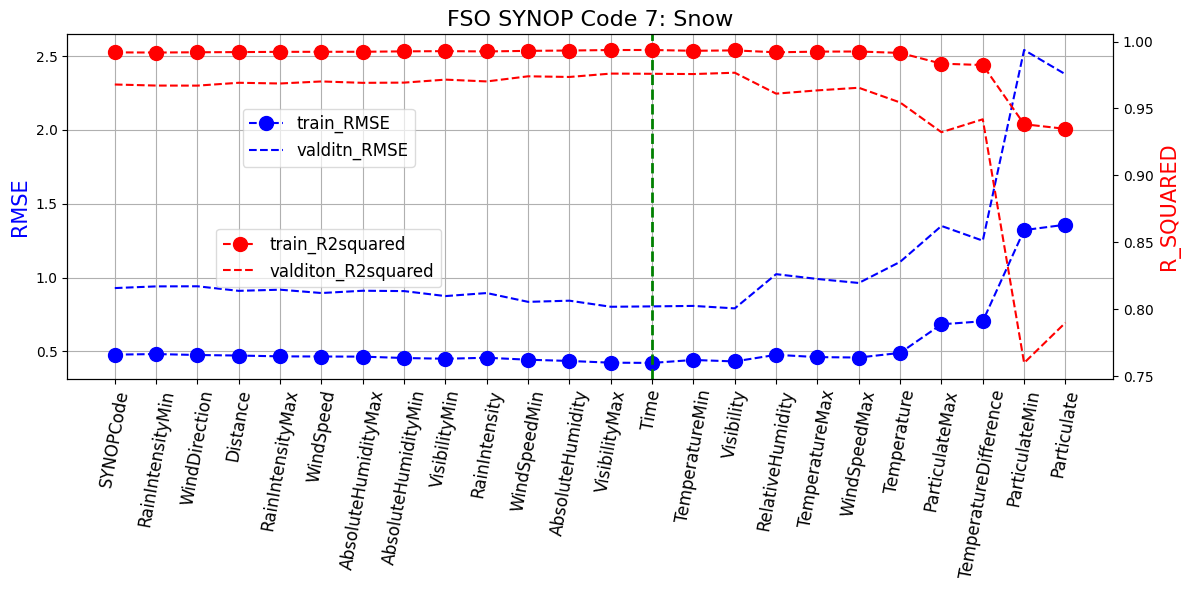

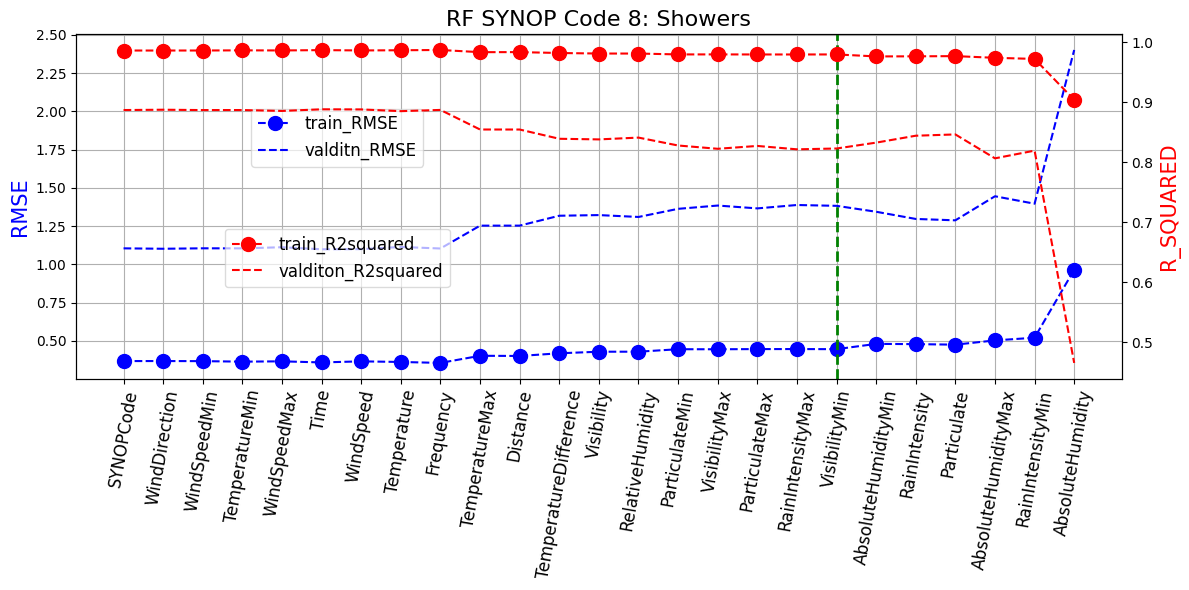

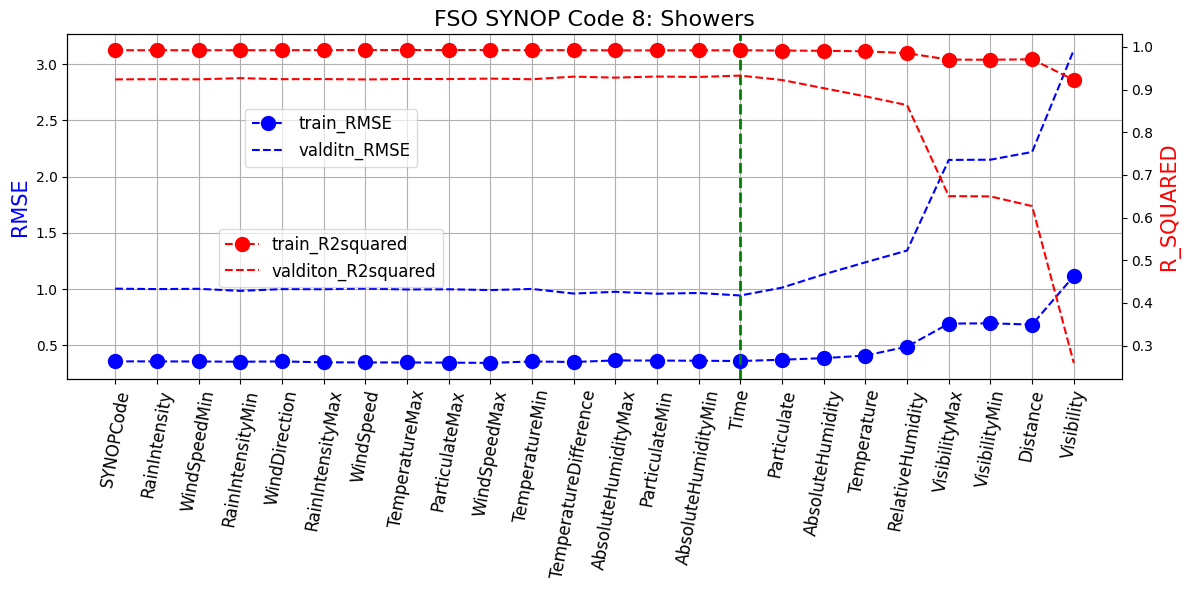

RF Specific RMSE List: [0.3716406999834535, 0.4676322776603015, 0.433952153259994, 0.7109831439376549, 0.928169223758514, 0.2910006735030931, 1.3841845490382685]
RF Specific R2 List: [0.9787899056003636, 0.9810460794489206, 0.9186381587538568, 0.9406658190156798, 0.9471627856520616, 0.9582428817135822, 0.8222926050420747]
FSO Specific RMSE List: [0.838693257860523, 2.2381638196151794, 0.7604381386582356, 1.0738290568464084, 0.90988295535555, 0.8083115567975064, 0.9651334531367992]
FSO Specific R2 List: [0.9429438447461106, 0.9470113616353576, 0.9591413837722028, 0.9123125818433796, 0.9568901037975568, 0.975717416130994, 0.929432336573282]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

weather_mapping = {
    0: "Clear",
    3: "Dust Storm",
    4: "Fog",
    5: "Drizzle",
    6: "Rain",
    7: "Snow",
    8: "Showers"
}

def plot_SYNOP_feature_importance(data, code=0, feat_threshold="VisibilityMin", model_name="FSO", marker_size=10, legend_positions=("upper left", "lower left")):

    abbs = {
        'WindDirection': 'WindDirection', 'WindSpeed': 'WindSpeed',
        'WindSpeedMin': 'WindSpeedMin', 'ParticulateMin': 'ParticulateMin', 'WindSpeedMax': 'WindSpeedMax',
        'TemperatureMin': 'TemperatureMin', 'TemperatureMax': 'TemperatureMax', 'Particulate': 'Particulate',
        'VisibilityMin': 'VisibilityMin', 'AbsoluteHumidityMax': 'AbsoluteHumidityMax', 'TemperatureDifference': 'TemperatureDifference',
        'AbsoluteHumidityMin': 'AbsoluteHumidityMin', 'Time': 'Time', 'VisibilityMax': 'VisibilityMax',
        'Frequency': 'Frequency', 'RelativeHumidity': 'RelativeHumidity', 'ParticulateMax': 'ParticulateMax',
        'Visibility': 'Visibility', 'SYNOPCode': 'SYNOPCode', 'Temperature': 'Temperature',
        'RainIntensityMin': 'RainIntensityMin', 'RainIntensityMax': 'RainIntensityMax', 'Distance': 'Distance',
        'RainIntensity': 'RainIntensity', 'AbsoluteHumidity': 'AbsoluteHumidity'
    }
    data["removing_feature"] = data["removing_feature"].map(abbs).fillna(data["removing_feature"])

    data = data[data["removing_feature"] != "All Features"]

    features = data["removing_feature"].tolist()
    TRAIN_RMSE = data["RMSE_TRAIN"]
    VAL_RMSE = data["RMSE_VAL"]
    TRAIN_R2 = data["R2_TRAIN"]
    VAL_R2 = data["R2_VAL"]

    fig, pl1 = plt.subplots(figsize=(12, 6))
    pl2 = pl1.twinx()

    clrs = ['blue', 'red']
    pl1.plot(features, TRAIN_RMSE, '--o', color=clrs[0], markersize=marker_size, label="train_RMSE")
    pl1.plot(features, VAL_RMSE, '--', color=clrs[0], markersize=marker_size, label="valditn_RMSE")
    pl2.plot(features, TRAIN_R2, '--o', color=clrs[1], markersize=marker_size, label="train_R2squared")
    pl2.plot(features, VAL_R2, '--', color=clrs[1], markersize=marker_size, label="valditon_R2squared")

    # llabels, title, legend n grid n tthresholdd
    pl1.set_ylabel('RMSE', color=clrs[0], fontsize=15)
    pl2.set_ylabel('R_SQUARED', color=clrs[1], fontsize=15)
    weather = weather_mapping.get(code, "Unknown")
    model_label = "RF" if model_name == "RFL" else "FSO"
    pl1.set_title(f'{model_label} SYNOP Code {code}: {weather}', fontsize=16)
    pl1.grid(True)

    pl1.legend(loc="center", bbox_to_anchor=(0.25, 0.7), framealpha=0.7, fontsize=12)
    pl2.legend(loc="center", bbox_to_anchor=(0.25, 0.35), framealpha=0.7, fontsize=12)

 
    if feat_threshold in features:
        threshold_index = features.index(feat_threshold)
        pl1.axvline(x=threshold_index, color='green', linestyle='--', linewidth=2)

    pl1.set_xticks(range(len(features)))
    pl1.set_xticklabels(features, rotation=80, fontsize=12)

    plt.tight_layout()
    plt.show()


specific_RF_RMSE_list = []
specifc_RF_R2_list = []

specific_FSO_RMSE_list = []
specific_FSO_R2_list = []

SYNOP = [0,3,4,5,6,7,8]

for code in SYNOP:
    RF_df = pd.read_csv(f"RF_feature_importance_{code}.csv")
    specific_RF_RMSE_list.append(RF_df.iloc[-10]['RMSE_VAL'])
    specifc_RF_R2_list.append(RF_df.iloc[-10]['R2_VAL'])
    plot_SYNOP_feature_importance(RF_df, code=code,  model_name="RFL", marker_size=10, legend_positions=("upper left", "lower left"))

    FSO_df = pd.read_csv(f"FSO_feature_importance_{code}.csv")
    specific_FSO_RMSE_list.append(FSO_df.iloc[-10]['RMSE_VAL'])
    specific_FSO_R2_list.append(FSO_df.iloc[-10]['R2_VAL'])
    plot_SYNOP_feature_importance(FSO_df, code=code, feat_threshold="Time", model_name="FSO", marker_size=10, legend_positions=("upper left", "lower left"))

print("RF Specific RMSE List:", specific_RF_RMSE_list)
print("RF Specific R2 List:", specifc_RF_R2_list)
print("FSO Specific RMSE List:", specific_FSO_RMSE_list)
print("FSO Specific R2 List:", specific_FSO_R2_list)


In [ ]:
synop_codes = [0, 3, 4, 5, 6, 7, 8]
feat_cols = ["AbsoluteHumidity", "AbsoluteHumidityMax", "AbsoluteHumidityMin", "Distance", "Frequency",
             "Particulate", "ParticulateMax", "ParticulateMin", "RainIntensity", "RainIntensityMax",
             "RainIntensityMin", "RelativeHumidity", "SYNOPCode", "Temperature", "TemperatureDifference",
             "TemperatureMax", "TemperatureMin", "Time", "Visibility", "VisibilityMax", "VisibilityMin",
             "WindDirection", "WindSpeed", "WindSpeedMax", "WindSpeedMin"]

feat_threshold = "RelativeHumidity"

RF_count = {feature: 0 for feature in feat_cols}
FSO_count = {feature: 0 for feature in feat_cols}


for code in synop_codes:
    # RF
    RF_DF = pd.read_csv(f"RF_feature_importance_{code}.csv")

    if feat_threshold in RF_DF["removing_feature"].values:
        threshold_index = RF_DF[RF_DF["removing_feature"] == feat_threshold].index[0]

        for feature, importance in zip(RF_DF["removing_feature"][threshold_index + 1:], RF_DF["importance_score"][threshold_index + 1:]):
            if feature in RF_count and importance > 0:
                RF_count[feature] += 1

    # FSO
    FSO_DF = pd.read_csv(f"FSO_feature_importance_{code}.csv")

    if feat_threshold in FSO_DF["removing_feature"].values:
        threshold_index = FSO_DF[FSO_DF["removing_feature"] == feat_threshold].index[0]

        for feature, importance in zip(FSO_DF["removing_feature"][threshold_index + 1:], FSO_DF["importance_score"][threshold_index + 1:]):
            if feature in FSO_count and importance > 0:
                FSO_count[feature] += 1

RF_Count_TABLE = pd.DataFrame(list(RF_count.items()), columns=["Feature", "Frequency"]).sort_values(by="Frequency", ascending=False)
FSO_COUNT_TABLE = pd.DataFrame(list(FSO_count.items()), columns=["Feature", "Frequency"]).sort_values(by="Frequency", ascending=False)

print(RF_Count_TABLE)
print("\n")
print(FSO_COUNT_TABLE)




                  Feature  Frequency
0        AbsoluteHumidity          6
1     AbsoluteHumidityMax          4
2     AbsoluteHumidityMin          4
8           RainIntensity          4
9        RainIntensityMax          4
10       RainIntensityMin          3
13            Temperature          3
3                Distance          3
7          ParticulateMin          2
18             Visibility          2
20          VisibilityMin          2
17                   Time          2
14  TemperatureDifference          2
5             Particulate          1
6          ParticulateMax          1
4               Frequency          1
15         TemperatureMax          1
23           WindSpeedMax          1
19          VisibilityMax          1
16         TemperatureMin          1
12              SYNOPCode          0
11       RelativeHumidity          0
21          WindDirection          0
22              WindSpeed          0
24           WindSpeedMin          0


                  Feature  Frequency

In [ ]:
#RF Specific RMSE List: [0.3716406999834535, 0.4676322776603015, 0.433952153259994, 0.7109831439376549, 0.928169223758514, 0.2910006735030931, 1.3841845490382685]
#RF Specific R2 List: [0.9787899056003636, 0.9810460794489206, 0.9186381587538568, 0.9406658190156798, 0.9471627856520616, 0.9582428817135822, 0.8222926050420747]
#FSO Specific RMSE List: [0.838693257860523, 2.2381638196151794, 0.7604381386582356, 1.0738290568464084, 0.90988295535555, 0.8083115567975064, 0.9651334531367992]
#FSO Specific R2 List: [0.9429438447461106, 0.9470113616353576, 0.9591413837722028, 0.9123125818433796, 0.9568901037975568, 0.975717416130994, 0.929432336573282]

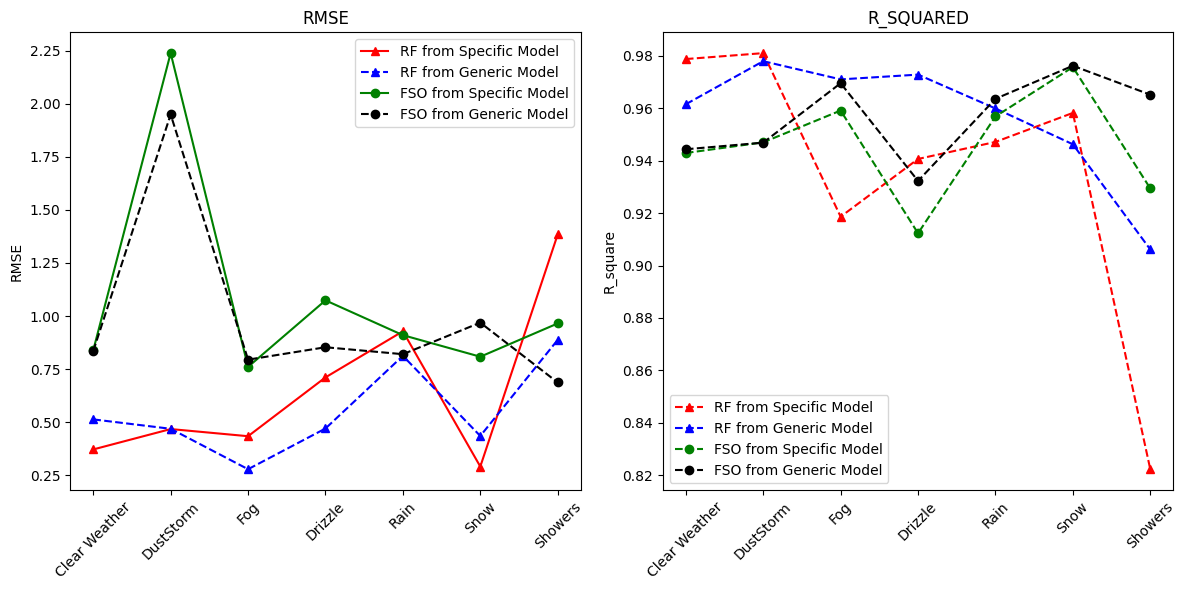

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

def metrics_calculate(model, X_TRAIN, Y_TRAIN, X_VAL, Y_VAL, use_oob=True):
    PRED_Y_TRAIN = model.predict(X_TRAIN)
    PRED_Y_VAL = model.predict(X_VAL)

    RMSE_TRAIN = np.sqrt(mean_squared_error(Y_TRAIN, PRED_Y_TRAIN))
    RMSE_VAL = np.sqrt(mean_squared_error(Y_VAL, PRED_Y_VAL))
    R2_TRAIN = r2_score(Y_TRAIN, PRED_Y_TRAIN)
    R2_VAL = r2_score(Y_VAL, PRED_Y_VAL)

    R2_OOB = model.oob_score_ if use_oob and hasattr(model, "oob_score_") else None

    return RMSE_TRAIN, R2_TRAIN, RMSE_VAL, R2_VAL, R2_OOB

def splitting_data(data, col_target, col_drop=None, test_size= 0.2, SPLIT_val_test=True, random_state=42):
    if col_drop:
        data = data.drop(columns=col_drop)

    X = data.drop(columns=[col_target])
    y = data[col_target]

    XTRAIN, TEMP_X, YTRAIN, TEMP_Y = train_test_split(X, y, test_size=test_size, random_state=random_state)

    if SPLIT_val_test:
        XVAL, XTEST, YVAL, YTEST = train_test_split(TEMP_X, TEMP_Y, test_size=0.5, random_state=random_state)
    else:
        XVAL =  TEMP_X
        YVAL = TEMP_Y
        XTEST = None
        YTEST = None

    return XTRAIN, XVAL, XTEST, YTRAIN, YVAL, YTEST

data = pd.read_csv("RFLFSODataFull.csv")

FSO_X_train, FSO_X_val, FSO_X_test, FSO_Y_train, FSO_Y_val, FSO_Y_test = splitting_data(data, "FSO_Att", col_drop=["Frequency", 'RFL_Att'])
RF_X_train, RF_X_val, RF_X_test, RF_Y_train, RF_Y_val, RF_Y_test = splitting_data(data, "RFL_Att", col_drop=['FSO_Att'])

RF_extract_imp = ['Frequency', 'Time', 'RelativeHumidity', 'SYNOPCode', "Visibility", "RainIntensityMin", "ParticulateMax", "Temperature", "RainIntensityMax", "Distance", "RainIntensity", "AbsoluteHumidity", "AbsoluteHumidityMax"]
FSO_extract_imp = ['Time', 'ParticulateMax', 'TemperatureDifference', 'TemperatureMax', 'RelativeHumidity', 'Particulate', 'TemperatureMin', "VisibilityMin", "AbsoluteHumidity", "VisibilityMax", "ParticulateMin", "Temperature", "Visibility", "Distance"]

RF_Specific_RMSE_List= [0.3716406999834535, 0.4676322776603015, 0.433952153259994, 0.7109831439376549, 0.928169223758514, 0.2910006735030931, 1.3841845490382685]
RF_Specific_R2_List= [0.9787899056003636, 0.9810460794489206, 0.9186381587538568, 0.9406658190156798, 0.9471627856520616, 0.9582428817135822, 0.8222926050420747]
FSO_Specific_RMSE_List= [0.838693257860523, 2.2381638196151794, 0.7604381386582356, 1.0738290568464084, 0.90988295535555, 0.8083115567975064, 0.9651334531367992]
FSO_Specific_R2_List= [0.9429438447461106, 0.9470113616353576, 0.9591413837722028, 0.9123125818433796, 0.9568901037975568, 0.975717416130994, 0.929432336573282]

RF_Generic_RMSE_List = []
RF_Generic_R2_List = []
FSO_Generic_RMSE_List = []
FSO_Generic_R2_List = []

SYNOP = [0, 3, 4, 5, 6, 7, 8]
for i in SYNOP:

    RF_SY_X_train = RF_X_train[RF_X_train['SYNOPCode'] == i]
    RF_SY_Y_train = RF_Y_train[RF_X_train['SYNOPCode'] == i]
    RF_SY_X_val = RF_X_val[RF_X_val['SYNOPCode'] == i]
    RF_SY_Y_val = RF_Y_val[RF_X_val['SYNOPCode'] == i]

    FSO_SY_X_train = FSO_X_train[FSO_X_train['SYNOPCode'] == i]
    FSO_SY_Y_train = FSO_Y_train[FSO_X_train['SYNOPCode'] == i]
    FSO_SY_X_val = FSO_X_val[FSO_X_val['SYNOPCode'] == i]
    FSO_SY_Y_val = FSO_Y_val[FSO_X_val['SYNOPCode'] == i]


    RF_model = RandomForestRegressor(n_estimators=130, max_depth= 30, min_samples_leaf=1, random_state=42,
                                     min_samples_split=4, oob_score=True, n_jobs=-1)

    FSO_model = RandomForestRegressor(n_estimators=140, max_depth= 30, min_samples_leaf=1, random_state=42,
                                      min_samples_split=4, oob_score=True, n_jobs=-1)


    RF_model.fit(RF_SY_X_train[RF_extract_imp], RF_SY_Y_train)
    FSO_model.fit(FSO_SY_X_train[FSO_extract_imp], FSO_SY_Y_train)


    RMSE_TRAIN, R2_TRAIN, RMSE_VAL, R2_VAL, oob_r2 = metrics_calculate(RF_model, RF_SY_X_train[RF_extract_imp], RF_SY_Y_train, RF_SY_X_val[RF_extract_imp], RF_SY_Y_val, use_oob=True)
    RF_Generic_RMSE_List.append(RMSE_VAL)
    RF_Generic_R2_List.append(R2_VAL)

    RMSE_TRAIN, R2_TRAIN, RMSE_VAL, R2_VAL, oob_r2 = metrics_calculate(FSO_model, FSO_SY_X_train[FSO_extract_imp], FSO_SY_Y_train, FSO_SY_X_val[FSO_extract_imp], FSO_SY_Y_val, use_oob=True)
    FSO_Generic_RMSE_List.append(RMSE_VAL)
    FSO_Generic_R2_List.append(R2_VAL)


list_of_weather = ["Clear Weather", "DustStorm", "Fog", "Drizzle", "Rain", "Snow", "Showers"]

fig, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].plot(list_of_weather, RF_Specific_RMSE_List, 'r^-', label='RF from Specific Model')
axis[0].plot(list_of_weather, RF_Generic_RMSE_List, 'b^--', label='RF from Generic Model')
axis[0].plot(list_of_weather, FSO_Specific_RMSE_List, 'go-', label='FSO from Specific Model')
axis[0].plot(list_of_weather, FSO_Generic_RMSE_List, 'ko--', label='FSO from Generic Model')
axis[0].set_title('RMSE')
axis[0].set_ylabel('RMSE')
axis[0].tick_params(axis='x', rotation=45)
axis[0].legend()

axis[1].plot(list_of_weather, RF_Specific_R2_List, 'r^--', label='RF from Specific Model')
axis[1].plot(list_of_weather, RF_Generic_R2_List, 'b^--', label='RF from Generic Model')
axis[1].plot(list_of_weather, FSO_Specific_R2_List, 'go--', label='FSO from Specific Model')
axis[1].plot(list_of_weather, FSO_Generic_R2_List, 'ko--', label='FSO from Generic Model')
axis[1].set_title('R_SQUARED')
axis[1].set_ylabel('R_square')
axis[1].tick_params(axis='x', rotation=45)
axis[1].legend()


fig.tight_layout()

plt.show()


In [ ]:
print("RF_Generic_RMSE_List = ", RF_Generic_RMSE_List)
print("RF_Generic_R2_List = ",RF_Generic_R2_List)

print("FSO_Generic_RMSE_List = ",FSO_Generic_RMSE_List)
print("FSO_Generic_R2_List = ",FSO_Generic_R2_List)


RF_Generic_RMSE_List =  [0.5131762562844293, 0.4689160653516627, 0.27848319360319773, 0.47026679167277935, 0.8124767180865168, 0.4350259606735612, 0.8876680319921847]
RF_Generic_R2_List =  [0.9615437458089662, 0.9779780788514115, 0.9710296914116516, 0.9728526822307997, 0.9599318535191531, 0.9462700719955423, 0.9061473736246095]
FSO_Generic_RMSE_List =  [0.8349678916391805, 1.949164338688559, 0.7945574392034987, 0.8529548308596125, 0.8202511211379527, 0.9688190789427672, 0.6869733457917914]
FSO_Generic_R2_List =  [0.9443709202235612, 0.946888934084112, 0.9695728557906438, 0.9322860591312739, 0.9636173248096987, 0.976228361558165, 0.9652008280478175]


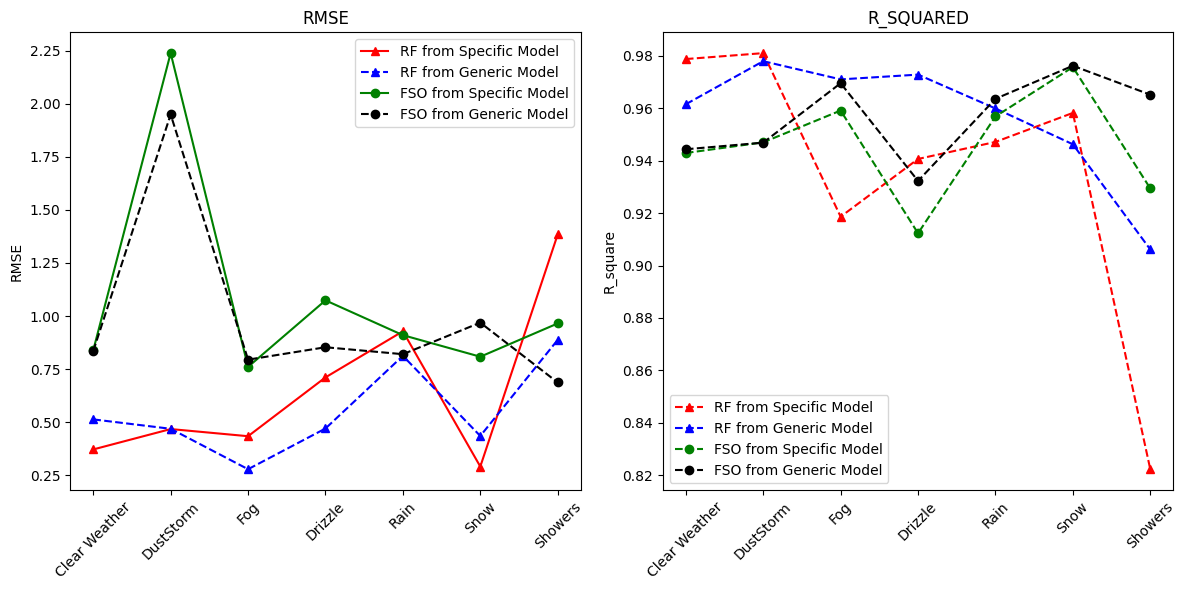

In [ ]:
RF_Specific_RMSE_List= [0.3716406999834535, 0.4676322776603015, 0.433952153259994, 0.7109831439376549, 0.928169223758514, 0.2910006735030931, 1.3841845490382685]
RF_Specific_R2_List= [0.9787899056003636, 0.9810460794489206, 0.9186381587538568, 0.9406658190156798, 0.9471627856520616, 0.9582428817135822, 0.8222926050420747]
FSO_Specific_RMSE_List= [0.838693257860523, 2.2381638196151794, 0.7604381386582356, 1.0738290568464084, 0.90988295535555, 0.8083115567975064, 0.9651334531367992]
FSO_Specific_R2_List= [0.9429438447461106, 0.9470113616353576, 0.9591413837722028, 0.9123125818433796, 0.9568901037975568, 0.975717416130994, 0.929432336573282]

RF_Generic_RMSE_List =  [0.5131762562844293, 0.4689160653516627, 0.27848319360319773, 0.47026679167277935, 0.8124767180865168, 0.4350259606735612, 0.8876680319921847]
RF_Generic_R2_List =  [0.9615437458089662, 0.9779780788514115, 0.9710296914116516, 0.9728526822307997, 0.9599318535191531, 0.9462700719955423, 0.9061473736246095]
FSO_Generic_RMSE_List =  [0.8349678916391805, 1.949164338688559, 0.7945574392034987, 0.8529548308596125, 0.8202511211379527, 0.9688190789427672, 0.6869733457917914]
FSO_Generic_R2_List =  [0.9443709202235612, 0.946888934084112, 0.9695728557906438, 0.9322860591312739, 0.9636173248096987, 0.976228361558165, 0.9652008280478175]

list_of_weather = ["Clear Weather", "DustStorm", "Fog", "Drizzle", "Rain", "Snow", "Showers"]
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].plot(list_of_weather, RF_Specific_RMSE_List, 'r^-', label='RF from Specific Model')
axis[0].plot(list_of_weather, RF_Generic_RMSE_List, 'b^--', label='RF from Generic Model')
axis[0].plot(list_of_weather, FSO_Specific_RMSE_List, 'go-', label='FSO from Specific Model')
axis[0].plot(list_of_weather, FSO_Generic_RMSE_List, 'ko--', label='FSO from Generic Model')
axis[0].set_title('RMSE')
axis[0].set_ylabel('RMSE')
axis[0].tick_params(axis='x', rotation=45)
axis[0].legend()

axis[1].plot(list_of_weather, RF_Specific_R2_List, 'r^--', label='RF from Specific Model')
axis[1].plot(list_of_weather, RF_Generic_R2_List, 'b^--', label='RF from Generic Model')
axis[1].plot(list_of_weather, FSO_Specific_R2_List, 'go--', label='FSO from Specific Model')
axis[1].plot(list_of_weather, FSO_Generic_R2_List, 'ko--', label='FSO from Generic Model')
axis[1].set_title('R_SQUARED')
axis[1].set_ylabel('R_square')
axis[1].tick_params(axis='x', rotation=45)
axis[1].legend()


fig.tight_layout()

plt.show()



In [ ]:
import pandas as pd

RF_Specific_RMSE_List= [0.3716406999834535, 0.4676322776603015, 0.433952153259994, 0.7109831439376549, 0.928169223758514, 0.2910006735030931, 1.3841845490382685]
RF_Specific_R2_List= [0.9787899056003636, 0.9810460794489206, 0.9186381587538568, 0.9406658190156798, 0.9471627856520616, 0.9582428817135822, 0.8222926050420747]
FSO_Specific_RMSE_List= [0.838693257860523, 2.2381638196151794, 0.7604381386582356, 1.0738290568464084, 0.90988295535555, 0.8083115567975064, 0.9651334531367992]
FSO_Specific_R2_List= [0.9429438447461106, 0.9470113616353576, 0.9591413837722028, 0.9123125818433796, 0.9568901037975568, 0.975717416130994, 0.929432336573282]

RF_Generic_RMSE_List =  [0.5131762562844293, 0.4689160653516627, 0.27848319360319773, 0.47026679167277935, 0.8124767180865168, 0.4350259606735612, 0.8876680319921847]
RF_Generic_R2_List =  [0.9615437458089662, 0.9779780788514115, 0.9710296914116516, 0.9728526822307997, 0.9599318535191531, 0.9462700719955423, 0.9061473736246095]
FSO_Generic_RMSE_List =  [0.8349678916391805, 1.949164338688559, 0.7945574392034987, 0.8529548308596125, 0.8202511211379527, 0.9688190789427672, 0.6869733457917914]
FSO_Generic_R2_List =  [0.9443709202235612, 0.946888934084112, 0.9695728557906438, 0.9322860591312739, 0.9636173248096987, 0.976228361558165, 0.9652008280478175]



rmse_data = {
    'Condition': ['Clear', 'Dust', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'generic FSO': [round(x, 2) for x in FSO_Generic_RMSE_List],
    'specific FSO': [round(x, 2) for x in FSO_Specific_RMSE_List],
    'generic RF': [round(x, 2) for x in RF_Generic_RMSE_List],
    'specific RF': [round(x, 2) for x in RF_Specific_RMSE_List]
}


r2_data = {
    'Condition': ['Clear', 'Dust', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'generic FSO': [round(x * 100, 2) for x in FSO_Generic_R2_List],
    'specific FSO': [round(x * 100, 2) for x in FSO_Specific_R2_List],
    'generic RF': [round(x * 100, 2) for x in RF_Generic_R2_List],
    'specific RF': [round(x * 100, 2) for x in RF_Specific_R2_List],
}


rmse_df = pd.DataFrame(rmse_data)
r2_df = pd.DataFrame(r2_data)


print("RMSE Table (Rounded to 2 Decimal Places):")
print(rmse_df)

print("\nR² Table (Converted to Percentage and Rounded to 2 Decimal Places):")
print(r2_df)


RMSE Table (Rounded to 2 Decimal Places):
  Condition  generic FSO  specific FSO  generic RF  specific RF
0     Clear         0.83          0.84        0.51         0.37
1      Dust         1.95          2.24        0.47         0.47
2       Fog         0.79          0.76        0.28         0.43
3   Drizzle         0.85          1.07        0.47         0.71
4      Rain         0.82          0.91        0.81         0.93
5      Snow         0.97          0.81        0.44         0.29
6   Showers         0.69          0.97        0.89         1.38

R² Table (Converted to Percentage and Rounded to 2 Decimal Places):
  Condition  generic FSO  specific FSO  generic RF  specific RF
0     Clear        94.44         94.29       96.15        97.88
1      Dust        94.69         94.70       97.80        98.10
2       Fog        96.96         95.91       97.10        91.86
3   Drizzle        93.23         91.23       97.29        94.07
4      Rain        96.36         95.69       95.99       